In [1]:
import polars as pl
import pandas as pd
import numpy as np
import pyarrow

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download Dataset or run in a kaggle notebook
# https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store

Read 5GB CSV file

In [3]:
df = pl.read_csv('C:/Users/LENOVO/Downloads/2019-Oct.csv')

Basic operations

In [4]:
df.shape

(42448764, 9)

Print options

In [5]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-10-01 00:…","""view""",44600062,2103807459595387724,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…"
"""2019-10-01 00:…","""view""",3900821,2053013552326770905,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…"
"""2019-10-01 00:…","""view""",17200506,2053013559792632471,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…"
"""2019-10-01 00:…","""view""",1307067,2053013558920217191,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…"
"""2019-10-01 00:…","""view""",1004237,2053013555631882655,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…"


In [6]:
print(df.head(2))

shape: (2, 9)
┌────────────┬────────────┬────────────┬────────────┬───┬──────────┬───────┬───────────┬───────────┐
│ event_time ┆ event_type ┆ product_id ┆ category_i ┆ … ┆ brand    ┆ price ┆ user_id   ┆ user_sess │
│ ---        ┆ ---        ┆ ---        ┆ d          ┆   ┆ ---      ┆ ---   ┆ ---       ┆ ion       │
│ str        ┆ str        ┆ i64        ┆ ---        ┆   ┆ str      ┆ f64   ┆ i64       ┆ ---       │
│            ┆            ┆            ┆ i64        ┆   ┆          ┆       ┆           ┆ str       │
╞════════════╪════════════╪════════════╪════════════╪═══╪══════════╪═══════╪═══════════╪═══════════╡
│ 2019-10-01 ┆ view       ┆ 44600062   ┆ 2103807459 ┆ … ┆ shiseido ┆ 35.79 ┆ 541312140 ┆ 72d76fde- │
│ 00:00:00   ┆            ┆            ┆ 595387724  ┆   ┆          ┆       ┆           ┆ 8bb3-4e00 │
│ UTC        ┆            ┆            ┆            ┆   ┆          ┆       ┆           ┆ -8c23-a03 │
│            ┆            ┆            ┆            ┆   ┆          ┆       ┆ 

In [7]:
df.head().to_pandas()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,None,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [8]:
# UTF8 -> string
# Int, Float as usual
df.dtypes

[Utf8, Utf8, Int64, Int64, Utf8, Utf8, Float64, Int64, Utf8]

Selecting and Filtering Data. Here I'll do operations that are similar to the SELECT and WHERE commands in SQL.

1. Indexing with [ works but is an "anti-pattern" in polars
There is no df.loc or df.iloc as polars doesn't have indexes

In [9]:
df[0,:]

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-10-01 00:…","""view""",44600062,2103807459595387724,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…"


In [10]:
df[:,['event_time', "price"]].head()

event_time,price
str,f64
"""2019-10-01 00:…",35.79
"""2019-10-01 00:…",33.2
"""2019-10-01 00:…",543.1
"""2019-10-01 00:…",251.74
"""2019-10-01 00:…",1081.98


In [11]:
# Works but looks awful
# df.filter(df["price"] > 100)

# Better to use this
df.filter(pl.col("price") > 1000).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-10-01 00:…","""view""",1004237,2053013555631882655,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…"
"""2019-10-01 00:…","""view""",1005135,2053013555631882655,"""electronics.sm…","""apple""",1747.79,535871217,"""c6bd7419-2748-…"
"""2019-10-01 00:…","""view""",1005135,2053013555631882655,"""electronics.sm…","""apple""",1747.79,535871217,"""c6bd7419-2748-…"
"""2019-10-01 00:…","""view""",1005105,2053013555631882655,"""electronics.sm…","""apple""",1415.48,529755884,"""0b828fb6-99bd-…"
"""2019-10-01 00:…","""view""",1005073,2053013555631882655,"""electronics.sm…","""samsung""",1207.71,543427258,"""4fc3e61d-5f94-…"


2. Select data with idiomatic polars

In [12]:
df.sample(5).to_pandas()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-23 00:51:12 UTC,view,26300325,2053013563424899933,None,None,250.41,553956880,a23c03aa-ff63-4ef6-8d73-065826cd44c2
1,2019-10-11 16:42:49 UTC,view,35104542,2070005009382114061,apparel.underwear,milavitsa,31.51,546672303,74811c30-1af7-4f8b-b98a-6cd1eb099b70
2,2019-10-21 16:44:42 UTC,view,22700062,2053013556168753601,None,aeroforce,217.51,538231950,ac51d3c5-573d-4f5b-a394-83b1c5cbd417
3,2019-10-24 16:57:16 UTC,view,12716413,2053013553559896355,None,triangle,63.06,515066771,94d54c46-8258-4820-9c67-8fe2e5987be1
4,2019-10-01 14:06:25 UTC,view,1002544,2053013555631882655,electronics.smartphone,apple,464.05,555657428,45b5fe6e-5399-418d-8dbe-2ed5ff7ec4a9


In [13]:
# SQL SELECT type of operation. Just selecting columns
df.select(['brand', 'price']).head()

brand,price
str,f64
"""shiseido""",35.79
"""aqua""",33.2
null,543.1
"""lenovo""",251.74
"""apple""",1081.98


In [14]:
# Keeps all the original columns and adds a new one
# Similar to a SELECT * in SQL
df.with_columns([
    (pl.col("price") * 100).alias("price_x_100")
]).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_x_100
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-10-01 00:…","""view""",44600062,2103807459595387724,null,"""shiseido""",35.79,541312140,"""72d76fde-8bb3-…",3579.0
"""2019-10-01 00:…","""view""",3900821,2053013552326770905,"""appliances.env…","""aqua""",33.2,554748717,"""9333dfbd-b87a-…",3320.0
"""2019-10-01 00:…","""view""",17200506,2053013559792632471,"""furniture.livi…",null,543.1,519107250,"""566511c2-e2e3-…",54310.0
"""2019-10-01 00:…","""view""",1307067,2053013558920217191,"""computers.note…","""lenovo""",251.74,550050854,"""7c90fc70-0e80-…",25174.0
"""2019-10-01 00:…","""view""",1004237,2053013555631882655,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…",108198.0


In [15]:
df.filter(pl.col("price") > 1000).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-10-01 00:…","""view""",1004237,2053013555631882655,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…"
"""2019-10-01 00:…","""view""",1005135,2053013555631882655,"""electronics.sm…","""apple""",1747.79,535871217,"""c6bd7419-2748-…"
"""2019-10-01 00:…","""view""",1005135,2053013555631882655,"""electronics.sm…","""apple""",1747.79,535871217,"""c6bd7419-2748-…"
"""2019-10-01 00:…","""view""",1005105,2053013555631882655,"""electronics.sm…","""apple""",1415.48,529755884,"""0b828fb6-99bd-…"
"""2019-10-01 00:…","""view""",1005073,2053013555631882655,"""electronics.sm…","""samsung""",1207.71,543427258,"""4fc3e61d-5f94-…"


In [16]:
df.filter(
    pl.col('brand').is_in(['apple', 'samsung', 'motorola'])
).head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-10-01 00:…","""view""",1004237,2053013555631882655,"""electronics.sm…","""apple""",1081.98,535871217,"""c6bd7419-2748-…"
"""2019-10-01 00:…","""view""",1005011,2053013555631882655,"""electronics.sm…","""samsung""",900.64,530282093,"""50a293fb-5940-…"
"""2019-10-01 00:…","""view""",1005135,2053013555631882655,"""electronics.sm…","""apple""",1747.79,535871217,"""c6bd7419-2748-…"
"""2019-10-01 00:…","""view""",1003306,2053013555631882655,"""electronics.sm…","""apple""",588.77,555446831,"""6ec635da-ea15-…"
"""2019-10-01 00:…","""view""",1003306,2053013555631882655,"""electronics.sm…","""apple""",588.77,555446831,"""6ec635da-ea15-…"


Computation on the select context

In [17]:
df.select([
    pl.col("product_id").n_unique()
])

product_id
u32
166794


In [18]:
df.select([
    pl.col("price").min().alias("min"),
    pl.col("price").mean().alias("mean"),
    pl.col("price").median().alias("median"),
    pl.col("price").max().alias("max"),
    pl.col("price").std().alias("std_dev"),
])

min,mean,median,max,std_dev
f64,f64,f64,f64,f64
0.0,290.323661,162.93,2574.07,358.269155


In [19]:
# compute describe at a series level
df.select([
    pl.col("price")
]).describe()

describe,price
str,f64
"""count""",4.2448764e7
"""null_count""",0.0
"""mean""",290.323661
"""std""",358.269155
"""min""",0.0
"""25%""",65.98
"""50%""",162.93
"""75%""",358.57
"""max""",2574.07


In [20]:
price = df.select([
    pl.col("price")
])

array([[<Axes: title={'center': 'price'}>]], dtype=object)

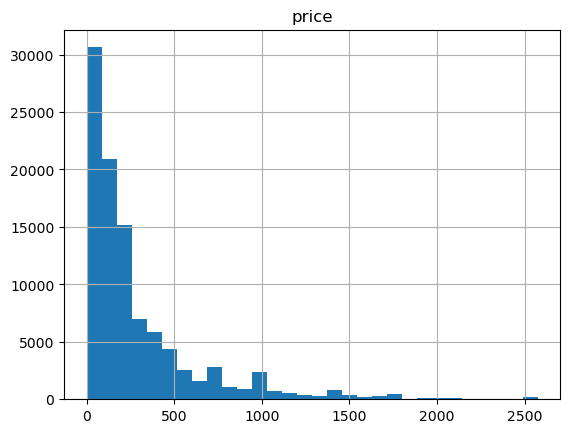

In [21]:
price.sample(100000).to_pandas().hist(bins=30)

In [22]:
# price.sample(1000)

In [23]:
probs = [0, 0.25, 0.5, 0.75, 1]
percentiles = [price.quantile(prob)[0,0] for prob in probs]
pd.DataFrame(dict(probs=probs, percentiles=percentiles))

,probs,percentiles
0,0.00,0.00
1,0.25,65.98
2,0.50,162.93
3,0.75,358.57
4,1.00,2574.07
